In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix


In [3]:
df=pd.read_csv("car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df.columns=col_names

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
for i in col_names:
    print(df[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [13]:

X=df.drop('class',axis=1)

In [14]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [15]:

Y=df['class']

In [16]:

le=LabelEncoder()


In [17]:

Y=le.fit_transform(Y)


In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,train_size=0.7)

In [19]:
oe=OrdinalEncoder()

In [20]:
 x_train=oe.fit_transform(x_train)
x_test=oe.transform(x_test)


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       118
           1       0.85      0.65      0.73        17
           2       0.99      1.00      0.99       361
           3       0.81      0.91      0.86        23

    accuracy                           0.97       519
   macro avg       0.90      0.88      0.88       519
weighted avg       0.97      0.97      0.97       519



,features,score
0,buying,0.187725
1,maint,0.161900
2,doors,0.067942
3,persons,0.218831
4,lug_boot,0.086977
5,safety,0.276625


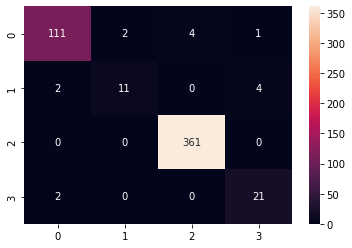

In [25]:

rfc=RandomForestClassifier( n_estimators=100,
 criterion='gini',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
max_features='sqrt',
bootstrap=True,
 )
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
dataframe=pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
dataframe
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
rfc.feature_importances_
pd.DataFrame({'features':df.drop('class',axis=1).columns,'score':rfc.feature_importances_})